<a href="https://colab.research.google.com/github/henrychinpc/Classification-of-Houses-and-Flats/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import os
import glob
import matplotlib
import pandas as pd 
import matplotlib.image as mpimg
import numpy as np
import imageio as im
from matplotlib import pyplot as plt
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

from PIL import Image
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/RMIT Deep Learning Dataset/datamodifiedname.zip"
!unzip -qq "/content/drive/My Drive/RMIT Deep Learning Dataset/datamodifiedname.zip"

'/content/drive/My Drive/RMIT Deep Learning Dataset/datamodifiedname.zip'
warning [/content/drive/My Drive/RMIT Deep Learning Dataset/datamodifiedname.zip]:  4294967296 extra bytes at beginning or within zipfile
  (attempting to process anyway)
file #1:  bad zipfile offset (local header sig):  4294967296
  (attempting to re-compensate)
file #86353:  bad zipfile offset (local header sig):  42831
  (attempting to re-compensate)


In [ ]:
!ls 

datafolder  drive  __MACOSX  sample_data


In [ ]:
!ls "/content/drive/My Drive/RMIT Deep Learning Dataset/datamodified.zip"
!unzip -qq "/content/drive/My Drive/RMIT Deep Learning Dataset/datamodified.zip"

'/content/drive/My Drive/RMIT Deep Learning Dataset/datamodified.zip'
warning [/content/drive/My Drive/RMIT Deep Learning Dataset/datamodified.zip]:  4294967296 extra bytes at beginning or within zipfile
  (attempting to process anyway)
file #1:  bad zipfile offset (local header sig):  4294967296
  (attempting to re-compensate)
replace __MACOSX/datamodified/._4532562~252500~bin1.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
file #86375:  bad zipfile offset (local header sig):  45401
  (attempting to re-compensate)
error:  zipfile read error


In [ ]:
!rm -r '/content/datamodifiedname'

In [ ]:
!rm -r '/content/datafolder/datamodified'

In [ ]:
cp -r '/content/datamodifiedname' '/content/foldernew'

In [ ]:
check = os.listdir('/content/foldernew/datamodifiedname')
check
#check.sort()
#len(check)
#!rm -f '/content/foldernew/datamodifiedname/.DS_Store'

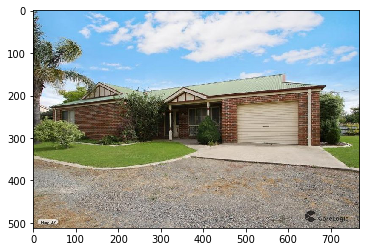

In [ ]:
foo = "/content/datamodifiedname/4639666.jpeg"
img = mpimg.imread(foo)
plt.imshow(img)

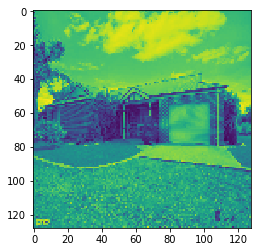

In [ ]:
img = image.load_img(foo, target_size=(128,128,1), color_mode="grayscale")
plt.imshow(img)

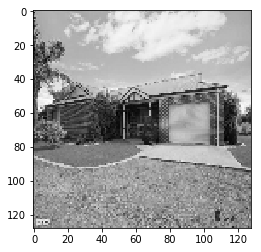

In [ ]:
plt.imshow(img, cmap=plt.cm.gray)

In [ ]:
imagesfoo = os.listdir('/content/datamodifiedname')
imagesfoo = ["".join(['/content/datamodifiedname/', filename]) for filename in imagesfoo]


In [ ]:
mylist = []

for imagefoo in imagesfoo:
  img = image.load_img(imagefoo)
  img = image.img_to_array(img)
  mylist.append(img)

In [ ]:
labels = pd.read_csv('/content/drive/My Drive/RMIT Deep Learning Dataset/property-labels.csv')
labels.set_index('property_id', inplace = True)
labels = pd.DataFrame(labels['property_type'].replace("flat", 0).replace("house", 1))
labels.shape

less_labels = labels
house = less_labels[less_labels["property_type"] == 1]
flat = less_labels[less_labels["property_type"] == 0]
labels_house_flat = pd.concat([house, flat])
labels_house_flat.shape

#not_house_flat = less_labels[~less_labels.property_type.isin([0, 1])]
#not_house_flat.shape

(59142, 1)

In [ ]:
labels

,property_type
property_id,
10000149,1
10000657,0
10000808,1
10001015,1
10001284,1
10001431,1
10001956,1
10002098,1
10002564,1


In [ ]:
labels_house_flat

In [ ]:
sortedlabels_house_flat = labels_house_flat.sort_values("property_id")
sortedlabels_house_flat.reset_index(inplace=True)
sortedlabels_house_flat


,property_id,property_type
0,1000519,1
1,1000651,1
2,1000896,1
3,1000973,1
4,1001356,1
5,1001379,1
6,1002850,1
7,1004145,1
8,1005214,1
9,1006072,0


In [ ]:
sortedlabels_house_flat['property_id'] = sortedlabels_house_flat['property_id'].astype(str)
#sortedlabels_house_flat['property_id'] = sortedlabels_house_flat['property']
sortedlabels_house_flat['property_id'] = sortedlabels_house_flat['property_id'] + '.jpeg'
sortedlabels_house_flat

,property_id,property_type
0,1000519.jpeg,1
1,1000651.jpeg,1
2,1000896.jpeg,1
3,1000973.jpeg,1
4,1001356.jpeg,1
5,1001379.jpeg,1
6,1002850.jpeg,1
7,1004145.jpeg,1
8,1005214.jpeg,1
9,1006072.jpeg,0


In [ ]:
sortedlabels_house_flat['property_type'] = sortedlabels_house_flat['property_type'].astype(str)
sortedlabels_house_flat['property_type']

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        0
10       1
11       0
12       0
13       0
14       1
15       0
16       0
17       1
18       1
19       1
20       0
21       0
22       1
23       1
24       1
25       1
26       0
27       1
28       1
29       1
        ..
59112    1
59113    1
59114    1
59115    0
59116    1
59117    1
59118    1
59119    0
59120    1
59121    1
59122    1
59123    1
59124    1
59125    1
59126    1
59127    1
59128    1
59129    1
59130    0
59131    1
59132    1
59133    1
59134    1
59135    1
59136    1
59137    1
59138    1
59139    0
59140    0
59141    1
Name: property_type, Length: 59142, dtype: object

In [ ]:
#sortedlabels_house_flat.set_index('property_id', inplace = True)
#labels.set_index('property_id', inplace = True)
#sortedlabels_house_flat.reset_index(inplace=True)
sortedlabels_house_flat

,property_id,property_type
0,1000519.jpeg,1
1,1000651.jpeg,1
2,1000896.jpeg,1
3,1000973.jpeg,1
4,1001356.jpeg,1
5,1001379.jpeg,1
6,1002850.jpeg,1
7,1004145.jpeg,1
8,1005214.jpeg,1
9,1006072.jpeg,0


In [ ]:
sortedlabels = sortedlabels_house_flat['property_type'].values
sortedlabels

array([1, 1, 1, ..., 0, 0, 1], dtype=object)

In [ ]:
sortedlabels_reshape = sortedlabels.reshape(-1,1)
sortedlabels_reshape

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]], dtype=object)

In [ ]:
folder = '/content/foldernew/datamodifiedname'

#sortedlabels_house_flat['prop']

In [ ]:
#train_df = pd.read_csv(sortedlabels_house_flat)
#valid_df = pd.read_csv(sortedlabels_house_flat)

train_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=sortedlabels_house_flat, 
    directory=folder, 
    x_col='property_id', 
    y_col='property_type', 
    target_size=(128, 128), 
    batch_size=32, 
    color_mode='grayscale', 
    class_mode='binary',
    subset='training',
    validate_filenames=False)

validation_generator = train_datagen.flow_from_dataframe(
    dataframe=sortedlabels_house_flat, 
    directory=folder, 
    x_col='property_id',
    y_col='property_type',
    target_size=(128, 128), 
    batch_size=32, 
    color_mode='grayscale', 
    class_mode='binary',
    subset='validation',
    validate_filenames=False)



# train_generator = train_datagen.flow_from_directory(
#         folder,
#         target_size=(150, 150),
#         batch_size=32)
#         #class_mode='binary')

# validation_generator = train_datagen.flow_from_directory(
#         folder,
#         target_size=(150, 150),
#         batch_size=32)
#         #class_mode='binary')


Found 47314 non-validated image filenames belonging to 2 classes.
Found 11828 non-validated image filenames belonging to 2 classes.


In [ ]:
train_generator.shape

AttributeError: ignored

In [ ]:
images = os.listdir('/content/datafolder/datamodified')
images = ["".join(['/content/datafolder/datamodified/', filename]) for filename in images]

In [ ]:
images

In [ ]:
indices = [int(filename) for filename in [filename.split("~")[0] for filename in [filename.split("/")[4] for filename in images]]]


In [ ]:
list.sort(indices)
indices

In [ ]:
str1 = ','.join(str(e) for e in indices)

str1

'1000519,1000651,1000896,1000973,1001356,1001379,1002850,1004145,1005214,1006072,1006321,1008100,1010542,1010638,1011517,1013349,1016112,1016697,1016989,1017310,1017410,1017477,1017975,1018483,1018491,1018750,1018841,1018940,1019088,1019295,1020765,1021106,1021344,1021557,1022569,1023217,1023673,1023751,1024219,1024348,1024445,1024524,1024592,1025560,1025873,1026063,1026093,1026288,1026808,1026816,1026841,1027893,1029048,1030192,1030221,1030748,1030907,1030992,1031189,1031696,1031816,1031933,1032220,1032885,1033464,1033649,1034614,1034975,1035018,1035409,1035929,1036046,1036354,1036646,1036917,1037860,1039373,1039539,1039616,1040124,1040242,1040383,1040468,1041020,1041077,1041686,1041845,1042268,1042277,1042439,1042812,1043095,1043108,1043556,1043750,1044043,1044044,1044929,1045255,1045313,1045744,1046005,1046007,1046170,1046362,1046498,1046615,1046989,1047319,1047380,1047636,1047837,1047900,1048062,1049008,1049325,1049823,1051101,1051689,1052301,1052349,1052507,1052608,1053692,1054096

In [ ]:
# mylist = []
 
# for imagefoo in images:
#     img = image.load_img(imagefoo, target_size=(128,128,1), color_mode="grayscale")
#     img = image.img_to_array(img)
#     mylist.append(img)

!for i in $(ls -1 "/content/datafolder/datamodified/"; do mv $i ${i/~*/}.jpeg; done
#!ls /content/datafolder/datamodified/

/bin/bash: -c: line 0: unexpected EOF while looking for matching `)'
/bin/bash: -c: line 1: syntax error: unexpected end of file


In [ ]:
#len(mylist)
indices_array = np.array(indices)
indices_array.shape

(59142,)

In [ ]:
type(indices_array)

numpy.ndarray

In [ ]:
sortedlabels_reshape

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]], dtype=object)

In [ ]:
X_train_array = np.array(X_train)
X_train_array

array(['/content/datamodified/6090375~2720000~bin5.jpeg',
       '/content/datamodified/5879513~730000~bin4.jpeg',
       '/content/datamodified/13597578~220000~bin1.jpeg', ...,
       '/content/datamodified/7409812~150000~bin1.jpeg',
       '/content/datamodified/4579083~665000~bin4.jpeg',
       '/content/datamodified/17403344~760000~bin4.jpeg'], dtype='<U48')

In [ ]:
check3 = os.listdir('/content/datafolder/datamodified')


In [ ]:
model = Sequential()
# model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=(128,128,1)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(3, 3)))
# model.add(Dropout(0.5))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(2, activation='sigmoid'))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu',input_shape=(128,128,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 128)     1280      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 126, 128)     147584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 126, 126, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 126, 126, 64)      73792     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 124, 124, 64)      36928     
_________________________________________________________________
dropout_2 (Dropout)          (None, 124, 124, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 124, 124, 64)   

In [ ]:
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", 
                               monitor = 'val_acc',
                               verbose=1, 
                               save_best_only=True)

In [ ]:
#history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
history = model.fit_generator(train_generator,
                                   steps_per_epoch = 100,
                                   epochs = 10,
                                   callbacks=[checkpointer],
                                   validation_data = validation_generator,
                                   validation_steps = 50)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





100/100 [==============================] - 4280s 43s/step - loss: 0.5471 - acc: 0.7734 - val_loss: 0.5621 - val_acc: 0.7525

Epoch 00001: val_acc improved from -inf to 0.75250, saving model to best_weights.hdf5
Epoch 2/10
100/100 [==============================] - 4183s 42s/step - loss: 0.5410 - acc: 0.7722 - val_loss: 0.5192 - val_acc: 0.7931

Epoch 00002: val_acc improved from 0.75250 to 0.79312, saving model to best_weights.hdf5
Epoch 3/10
100/100 [==============================] - 4267s 43s/step - loss: 0.5514 - acc: 0.7634 - val_loss: 0.5305 - val_acc: 0.7794

Epoch 00003: val_acc did not improve from 0.79312
Epoch 4/10
100/100 [==============================] - 4202s 42s/step - loss: 0.5439 - acc: 0.7697 - val_loss: 0.5052 - val_acc: 0.7975

Epoch 00004: val_acc improved from 0.79312 to 0.79750, saving model to best_weights.hdf5
Epoch 5/10
100/100 [====================

In [ ]:
#ls '/content/foldernew/datamodified'
import keras
keras.__version__

'2.2.5'

In [ ]:
model.save('/content/my_model.h5')

In [ ]:
from keras.models import load_model
model = load_model('/content/my_model.h5')
model

In [ ]:
dir(model)